## Многослойный перцептрон
![graph](https://upload.wikimedia.org/wikipedia/ru/thumb/d/de/Neuro.PNG/800px-Neuro.PNG)

$$y=h(\sum_{i=1}^k w_ix_i+w_0)$$
Уже двуслойная сеть может апркосимировать любую функцию

In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (12,6)
plt.rc('font', family='Arial')
# plt.style.use('ggplot')

np.set_printoptions(suppress=True)

In [2]:
RANDOM_STATE = 123
np.random.seed(RANDOM_STATE)

In [3]:
from sklearn.datasets import make_classification

Генерируем выборку.

In [27]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=RANDOM_STATE, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

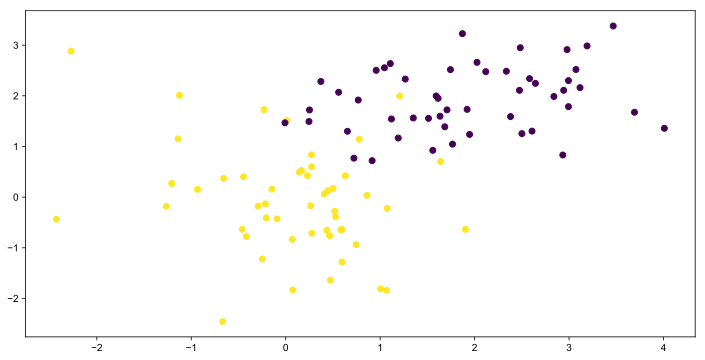

In [28]:
__ = plt.scatter(X[:, 0], X[:, 1], c=y)

Шкалируем признаки.

In [16]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaller = StandardScaler()
X_norm = scaller.fit_transform(X, y)

Разделяем на тестовую и обучающую.

In [20]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=RANDOM_STATE)
print(f"Train size: {X_train.shape[0]}, test size: {X_test.shape[0]}")

Train size: 80, test size: 20


Визуализируем оба массива данных на одном графике.

In [24]:
from matplotlib.colors import ListedColormap

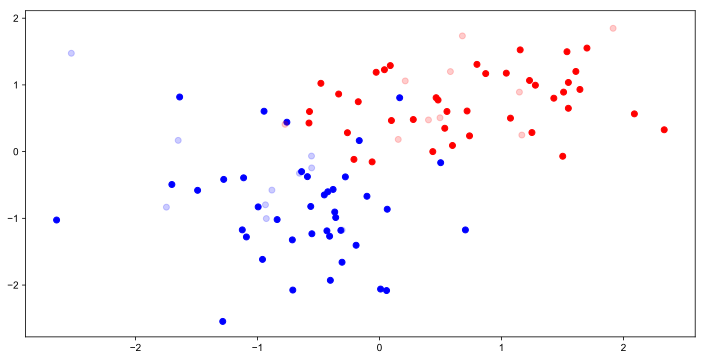

In [31]:
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
__ = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
__ = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2)

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Обучаем перцептрон и определяем качество.

In [ ]:
params = dict(
    hidden_layer_sizes=(2,)
)

In [97]:
nn = MLPClassifier(hidden_layer_sizes=(2,4,5), learning_rate='adaptive', max_iter=1000, alpha=1, random_state=RANDOM_STATE)
clsf = nn.fit(X_train, y_train)
clsf.score(X_test, y_test)

1.0

In [98]:
h = 0.02

x_min, x_max = X_norm[:, 0].min() - .5, X_norm[:, 0].max() + .5
y_min, y_max = X_norm[:, 1].min() - .5, X_norm[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
Z = clsf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

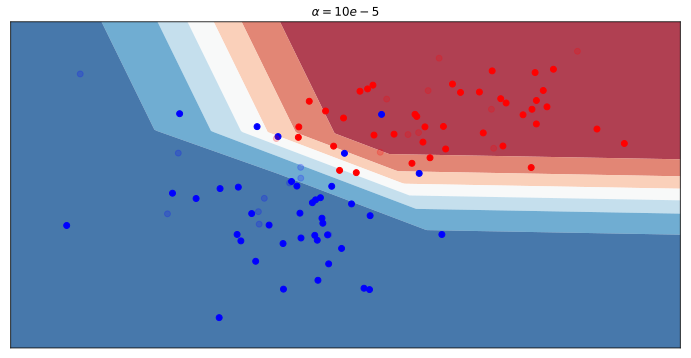

In [100]:
Zh = Z[:,1].reshape(xx.shape)
__ = plt.contourf(xx, yy, Zh, cmap=plt.cm.RdBu, alpha=.8)
__ = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
__ = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2)

__ = plt.xlim(xx.min(), xx.max())
__ = plt.ylim(yy.min(), yy.max())
__ = plt.xticks(())
__ = plt.yticks(())
__ = plt.title('$\\alpha=10e-5$')

In [101]:
from sklearn.datasets import make_moons, make_circles

In [102]:
datas1 = make_moons(noise=0.3, random_state=0),
datas2 = make_circles(noise=0.2, factor=0.5, random_state=1)

In [64]:
# Повторить на этих датасетах с изменением количества параметров сети